# EDA - Accounts

In [1]:
from pathlib import Path
accounts_csv_file = Path().cwd().parent / 'data' / 'accounts.csv'

from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Create dataframe from csv.
accounts = pd.read_csv(accounts_csv_file)

In [3]:
# Quick look at the data.
accounts.head()

,account_id,user_name,first_name,last_name,account_type,created_at
0,1.00,Danielle Johnson,Danielle,Johnson,joint,2022-02-23
1,2.00,Jeffrey Doyle,Jeffrey,Doyle,individual,2024-02-27
2,3.00,Patricia Miller,Patricia,Miller,individual,2022-11-18
3,4.00,Anthony Robinson,Anthony,Robinson,joint,2023-04-20
4,5.00,Anthony Gonzalez,Anthony,Gonzalez,retirement,2024-01-09


In [4]:
# Non-null count and Dtypes for each column.
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30018 entries, 0 to 30017
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    29975 non-null  float64
 1   user_name     29969 non-null  object 
 2   first_name    29958 non-null  object 
 3   last_name     29960 non-null  object 
 4   account_type  29967 non-null  object 
 5   created_at    29969 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [5]:
# Show dataframe stats.
print(f'Shape of accounts dataframe: {accounts.shape}')
accounts.describe(include='all')

Shape of accounts dataframe: (30018, 6)


,account_id,user_name,first_name,last_name,account_type,created_at
count,29975.00,29969,29958,29960,29967,29969
unique,NaN,25531,942,1269,135,1959
top,NaN,Michael Williams,Michael,Smith,individual,2023-08-18
freq,NaN,11,703,633,9939,31
mean,15799.52,NaN,NaN,NaN,NaN,NaN
std,29592.02,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN
25%,7504.50,NaN,NaN,NaN,NaN,NaN
50%,15008.00,NaN,NaN,NaN,NaN,NaN
75%,22515.50,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove leading/trailing whitespace from strings & convert to lowercase and recheck counts, unique values and freq.
accounts = accounts.map(lambda x: x.strip().lower() if isinstance(x, str) else x)
accounts.columns = accounts.columns.str.strip().str.lower()
accounts.describe(include='all')

,account_id,user_name,first_name,last_name,account_type,created_at
count,29975.00,29969,29958,29960,29967,29969
unique,NaN,25493,804,1120,110,1827
top,NaN,michael williams,michael,smith,individual,2023-08-18
freq,NaN,11,704,640,9997,32
mean,15799.52,NaN,NaN,NaN,NaN,NaN
std,29592.02,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN
25%,7504.50,NaN,NaN,NaN,NaN,NaN
50%,15008.00,NaN,NaN,NaN,NaN,NaN
75%,22515.50,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for dupes.
print(f'Duplicate values in accounts:\n{accounts.apply(lambda x: x.duplicated().sum())}')

Duplicate values in accounts:
account_id         60
user_name        4524
first_name      29213
last_name       28897
account_type    29907
created_at      28190
dtype: int64


In [8]:
# Check for missing values.
print(f'Missing values in account positions:\n{accounts.isna().sum()}')

Missing values in account positions:
account_id      43
user_name       49
first_name      60
last_name       58
account_type    51
created_at      49
dtype: int64


['joint', 'individual', 'retirement', 'reirement', nan, 'joind', 'jiont', 'ingdividual', 'rtirement', 'nidividual', 'individual-', 'jointl', 'joinat', 'individuael', 'retireyment', 'join', 'boint', 'joinq', 'joit', 'joitn', 'joqnt', 'joknt', 'retirement7', 'retirenment', 'jointm', 'retiremenw', 'ertirement', 'joint-', 'indiviudal', 'retiremenz', 'individuaql', 'retidement', 'retirexment', 'indiidual', 'joinbt', 'indjvidual', 'joifnt', 'joint0', 'jointu', 'individul', 'jonit', 'retirementk', 'rftirement', 'retiremetn', 'individualp', 'vndividual', 'indivdiual', 'icdividual', 'retrement', 'individualb', 'indvividual', 'joinft', 'reticement', 'indivihdual', 'jint', 'retiremenp', 'retirementu', 'jointw', 'joilt', 'retiremnet', 'retirementd', 'inhividual', 'joinot', 'jont', 'indiviual', 'etirement', 'individuakl', 'joint_', 'josint', 'retiremnt', 'retiremenq', 'idnividual', 'retirement-', 'ojint', 'joinmt', 'retirewent', 'iddividual', 'individuals', 'oindividual', 'ryetirement', 'indiviwdua

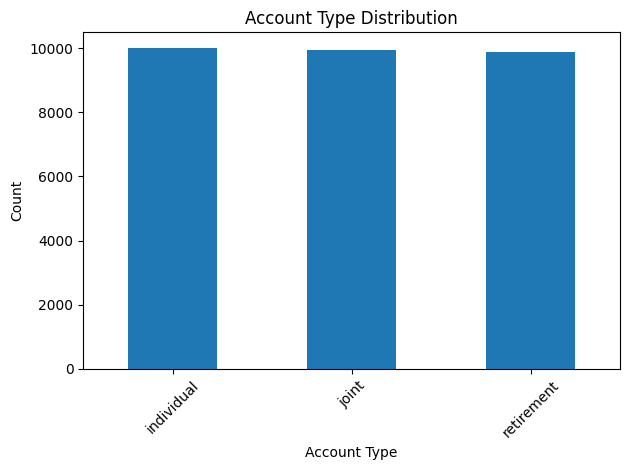

In [9]:
# Account types comparison (before fix).
account_types = accounts['account_type'].unique().tolist()
print(account_types)

counts = accounts['account_type'].value_counts()[['individual', 'joint', 'retirement']]
counts.plot(kind='bar')
plt.title('Account Type Distribution')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()  # Prevents label cutoff
plt.show()

## Notes
- account_id should be converted to integer
- created_at should be converted to datetime
- account types need to be fixed
- drop rows with any null or invalid values
- create separate df to contain all rows null and invalid values